## Project: Sentiment Analysis of British Airways Customer Reviews for Service Improvement
<p align="right">
  <img src="ba logo.png" alt="Description" width="200">
</p>

##### [🔗Click here to See full Project in My Portfolio](https://github.com/hussain-data-analyst/DataAnalystPortfolioProjects)

**Workflow of the Project**

1. **Data Collection (Web Scraping)**
2. **Dataset Overview**
3. **Data Cleaning and Preprocessing**
4. **Exploratory Data Analysis**
5. **Text Preprocessing**
6. **Vectorization**
7. **Model Building**
8. **Model Evaluation**
- **End**

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### 1.Data Scraping

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

### 2. Exploring the Dataset

In [6]:
import pandas as pd

In [9]:
df = pd.DataFrame({"Review":heading,"Description":reviews,"Rating":rating})

In [11]:
df.to_csv('Ba_raw_reviews.csv',index = False)

In [13]:
data = pd.read_csv('Ba_raw_reviews.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       3000 non-null   object
 1   Description  3000 non-null   object
 2   Rating       3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [17]:
print("We have",df.shape[0],'Reviews in our Dataset.')
df.head()

We have 3000 Reviews in our Dataset.


,Review,Description,Rating
0,"""support staff wash their hands of you""",✅ Trip Verified | I decided to treat myself a...,[1/10]
1,"""no fuss, no bother experience""",Not Verified | I was very impressed with thei...,[9/10]
2,"""Who can trust BA to travel2",Not Verified | The flight scheduled at 1840 l...,[1/10]
3,"""just another poor airline""",✅ Trip Verified | I have been flying BA for ...,[5/10]
4,"""spent two hours trying to make contact with BA""",✅ Trip Verified | On arriving at Mexico Airp...,[1/10]


In [19]:
data['Review'][7]

'“Appalling service”'

In [21]:
data['Description'][7]

'✅ Trip Verified |   Appalling service with failing defective fleet of A380 aircraft. Flown four times on this route or return and significant delays of 2 to 26 hours every time. BA56 boarded 6:20pm on 13 October. Flight cancelled for technical reasons. Six hours to return through customs and recover bag. No BA management at all at Johannesburg that night. Further four hours to organise a hotel and transfer with queues of 300 people to check in. Room eventually accessed 4:30am No attempt to re-schedule or assist - Pilot trying to announce process.'

Here we can see that 'Review' feature is not giving so much information so will perfoma our analysis on 'Description' feature wich is also a review but in descripted format. so let's bigin !

### 3. Data Cleaning and Preprocessing

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       3000 non-null   object
 1   Description  3000 non-null   object
 2   Rating       3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [26]:
data['Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: Rating
Non-Null Count  Dtype 
--------------  ----- 
3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


1.Let's conver 'Rating' column into a Single digit Ratings out of 10

In [29]:
def convert_rating(col):
    num = col[2]
    num = int(num)
    return (num)

In [31]:
data.head()

,Review,Description,Rating
0,"""support staff wash their hands of you""",✅ Trip Verified | I decided to treat myself a...,['1/10']
1,"""no fuss, no bother experience""",Not Verified | I was very impressed with thei...,['9/10']
2,"""Who can trust BA to travel2",Not Verified | The flight scheduled at 1840 l...,['1/10']
3,"""just another poor airline""",✅ Trip Verified | I have been flying BA for ...,['5/10']
4,"""spent two hours trying to make contact with BA""",✅ Trip Verified | On arriving at Mexico Airp...,['1/10']


In [33]:
data['Rating'] = data['Rating'].apply(convert_rating)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       3000 non-null   object
 1   Description  3000 non-null   object
 2   Rating       3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


2. Lets convert Feature 'Description' feature into Two Features (i). 'Verification' (ii) 'Description'

In [39]:
data[['Verification', 'Description']] = data['Description'].str.split('|', expand=True)

3. Create a new two new columns showing lenth of the review text

In [46]:
# Create a text length column for 'text' of review
data['Review_Len'] = data['Review'].apply(len)

In [48]:
data.isnull().sum()

Review            0
Description     643
Rating            0
Verification      0
Review_Len        0
dtype: int64

Here we got 643 NULL values in our 'Description' feature let's see where are these null values and why

In [53]:
data[data['Description'].isnull()].head()

,Review,Description,Rating,Verification,Review_Len
1452,"""service is very attentive and polite""",None,7,Two regular an uneventful flights. Curiously e...,38
2093,"""crew were helpful and attentive""",None,7,Flew London Gatwick to Tampa with British Airw...,33
2097,"""a dirty seat and cabin""",None,7,Frankfurt to Cape Town via London Heathrow. Th...,24
2106,"""surly and generally unhelpful""",None,1,Bangkok to Manchester via London. I used to fl...,31
2107,"""It was hard as rock and very uncomfortable""",None,3,The return flight from St Lucia started well. ...,44


Here we can see in varification column there no varification status and our Description text has moved to the varification feature, let's fill these null values with the corresponding row in 'Verification' feature.

In [83]:
data['Description'] = data['Description'].fillna(data['Verification'])

In [85]:
# Create a text length column for 'Review' of review
data['Description_Len'] = data['Description'].apply(len)

4. Let's create an another column 'Categ_Rating' based on the column 'Rating' to classify the reviews into negative and positive reviews.

In [91]:
# Function to categorize ratings
def categorize_rating(rating):
    # Ensure the rating is an integer
    rating = int(rating)  

    if rating <= 4:
        return 'Negative'
    elif 5 <= rating <= 6:
        return 'Neutral'
    else:
        return 'Positive'

In [95]:
data['Categ_Rating']= data['Rating'].apply(categorize_rating)

###  Let's Save the final cleaned file Data in CSV format as 'ba_review.csv' .

In [107]:
data.to_csv('ba_review.csv',index =False)

### 4. Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
badf = pd.read_csv('ba_review.csv')

In [6]:
badf.head()

,Review,Description,Rating,Verification,Review_Len,Descripion,Description_Len,Categ_Rating
0,"""support staff wash their hands of you""",I decided to treat myself and my teenage dau...,1,✅ Trip Verified,40,I decided to treat myself and my teenage dau...,2896,Negative
1,"""no fuss, no bother experience""",I was very impressed with their efficient bo...,9,Not Verified,31,I was very impressed with their efficient bo...,219,Positive
2,"""Who can trust BA to travel2",The flight scheduled at 1840 left 2hours 40 ...,1,Not Verified,28,The flight scheduled at 1840 left 2hours 40 ...,784,Negative
3,"""just another poor airline""",I have been flying BA for over 15 years. I ...,5,✅ Trip Verified,27,I have been flying BA for over 15 years. I ...,867,Neutral
4,"""spent two hours trying to make contact with BA""",On arriving at Mexico Airport we were told ...,1,✅ Trip Verified,48,On arriving at Mexico Airport we were told ...,2260,Negative


### Let's Explore the reviews

In [10]:
badf['Review'].head()

0            "support staff wash their hands of you" 
1                     "no fuss, no bother experience"
2                        "Who can trust BA to travel2
3                         "just another poor airline"
4    "spent two hours trying to make contact with BA"
Name: Review, dtype: object

In [12]:
badf['Description'][0]

"  I decided to treat myself and my teenage daughter to World Traveller Plus on the return leg of our Canada holiday, paying hundreds of pounds extra to do so... only to end up spending nine and a half hours trapped in a broken seat staring at a blank screen after both our entertainment systems failed to work. I hadn't bought a book or uploaded a film because I had assumed I would be enjoying the entertainment BA had promised. So I decided to lie back and get some rest instead, only to discover that the leg rest on my seat didn't work. The flight attendant was able to prop it up manually by shoving things underneath, but unfortunately this only made matters worse because it became firmly stuck in the up position, forcing my body into an awkward position during the descent, when I had to keep my seatback upright, leaving me with back pain that lasted three days (I have a bad lower back). Early on in this experience I asked to be moved to economy so that I could sit normally and watch a 

In [14]:
badf['Description'][1]

'  I was very impressed with their efficient boarding, the relatively (compared to Air Canada) comfortable seats and the quality of the food. Drinks and snacks frequently offered. Overall a no fuss, no bother experience.'

##### Oncomparing above Short and Descripted reviews we can see that 'Short Review is nothing but Just a Opinion of the Customer
##### In this project we are Going to focus on 'Descripted Reviews'

In [17]:
badf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           3000 non-null   object
 1   Description      3000 non-null   object
 2   Rating           3000 non-null   int64 
 3   Verification     3000 non-null   object
 4   Review_Len       3000 non-null   int64 
 5   Descripion       3000 non-null   object
 6   Description_Len  3000 non-null   int64 
 7   Categ_Rating     3000 non-null   object
dtypes: int64(3), object(5)
memory usage: 187.6+ KB


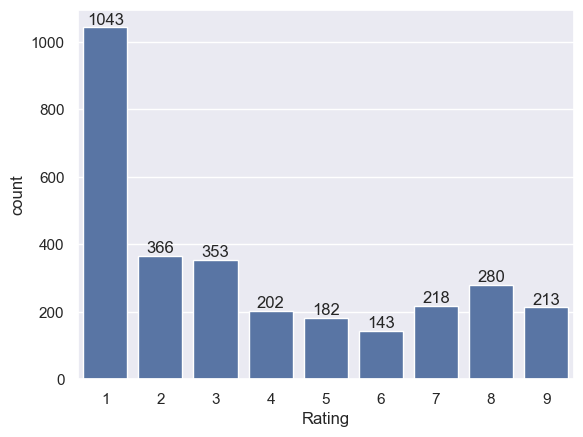

In [19]:
ax = sns.countplot(data = badf,x='Rating')
ax.bar_label(ax.containers[0])
plt.show()

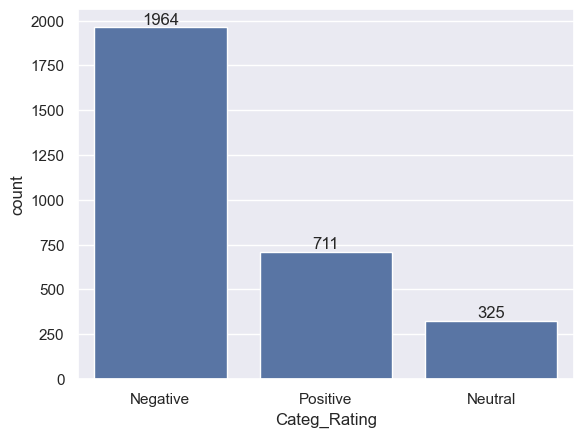

In [21]:
ax = sns.countplot(data = badf,x='Categ_Rating')
ax.bar_label(ax.containers[0])
plt.show()

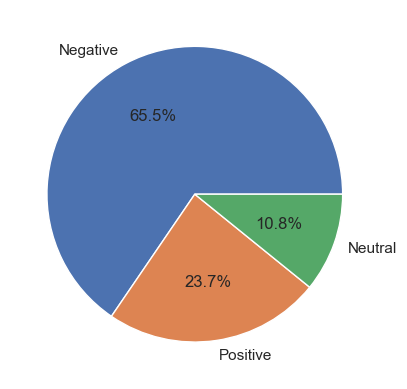

In [393]:
plt.pie(badf['Categ_Rating'].value_counts(),labels = ['Negative','Positive','Neutral'] ,autopct = '%1.1f%%')
plt.show()

- Let's see if there is any correlation Between 'Review Length' and 'Review Description' ?

In [24]:
badf[['Review_Len','Description_Len']].corr()

,Review_Len,Description_Len
Review_Len,1.000000,0.153866
Description_Len,0.153866,1.000000


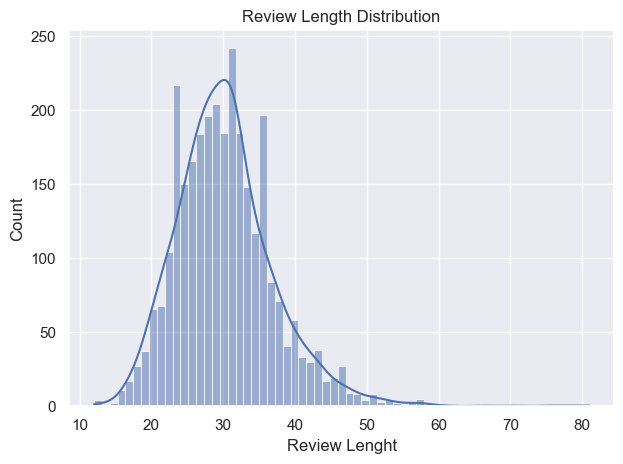

In [26]:
ax = sns.histplot(badf['Review_Len'],kde = True)
ax.set_xlabel('Review Lenght')
ax.set_title('Review Length Distribution')
plt.tight_layout()
plt.show()

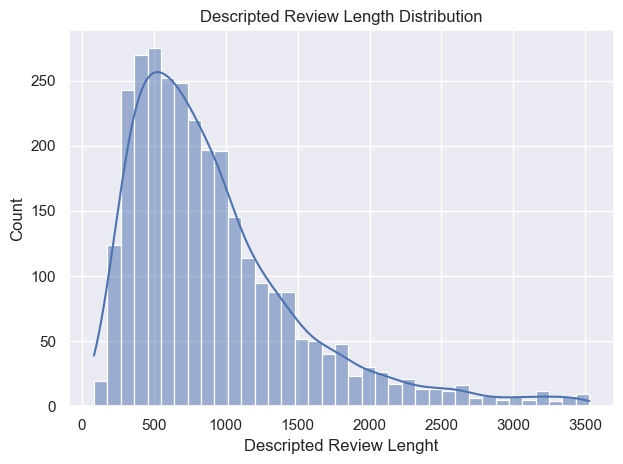

In [28]:
ax = sns.histplot(badf['Description_Len'],kde = True)
ax.set_xlabel('Descripted Review Lenght')
ax.set_title('Descripted Review Length Distribution')
plt.tight_layout()
plt.show()

In [30]:
badf['Description_Len'].describe()

count    3000.000000
mean      918.561333
std       605.463002
min        83.000000
25%       488.750000
50%       765.000000
75%      1164.000000
max      3529.000000
Name: Description_Len, dtype: float64

<Axes: xlabel='Categ_Rating', ylabel='Description_Len'>

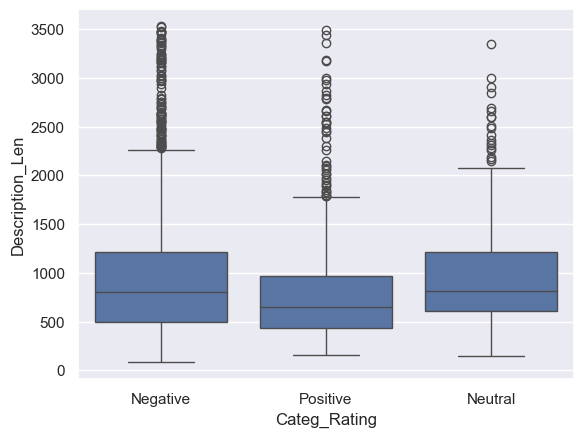

In [32]:
sns.boxplot(data = badf, y = 'Description_Len', x = 'Categ_Rating')

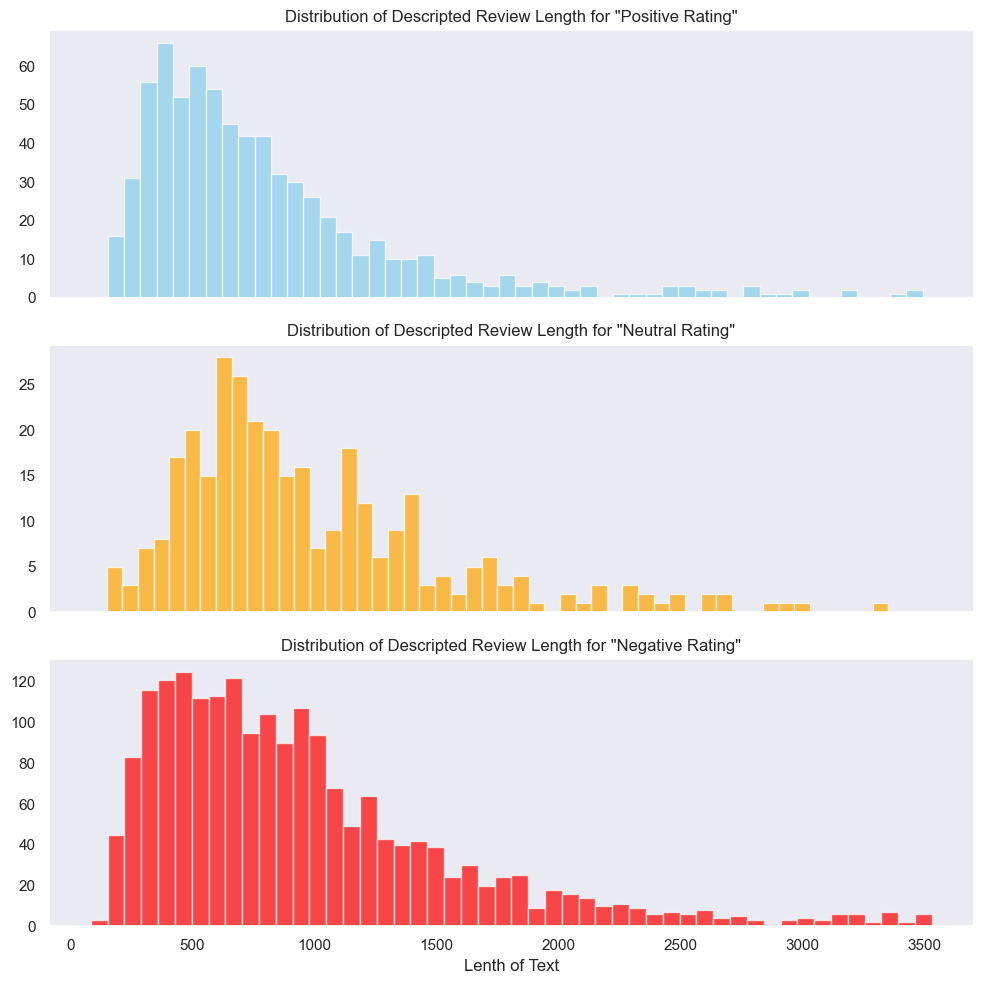

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

# Plot histogram for ratings 1 and 2 (assuming those exist in your dataset)
badf[badf['Categ_Rating'] =='Positive']['Description_Len'].hist(bins=50, ax=ax[0], color='skyblue', alpha=0.7)
ax[0].set_title('Distribution of Descripted Review Length for "Positive Rating"')

badf[badf['Categ_Rating'] =='Neutral']['Description_Len'].hist(bins=50, ax=ax[1], color='orange', alpha=0.7)
ax[1].set_title('Distribution of Descripted Review Length for "Neutral Rating"')

badf[badf['Categ_Rating'] == 'Negative']['Description_Len'].hist(bins=50, ax=ax[2], color='red', alpha=0.7)
ax[2].set_title('Distribution of Descripted Review Length for "Negative Rating"')
ax[2].set_xlabel("Lenth of Text") 

# Remove grids from all subplots
for a in ax:
    a.grid(False)

plt.tight_layout()
plt.show()


You can see there are some outliers in 'Positive' and 'Negative' distridbution meaning
- There are some extremelyl long review text in Positive and Negetive Reviews

**Here in this Project we are going to make a Classification model for Negative and Positive reviews so let's consider our 'Description' reviews and 'Categ_Rating' for 'Positive' and 'Negative' rating and leave everything**

In [5]:
final_badf = badf[badf['Categ_Rating'].isin (['Positive','Negative'])][['Description','Categ_Rating']]

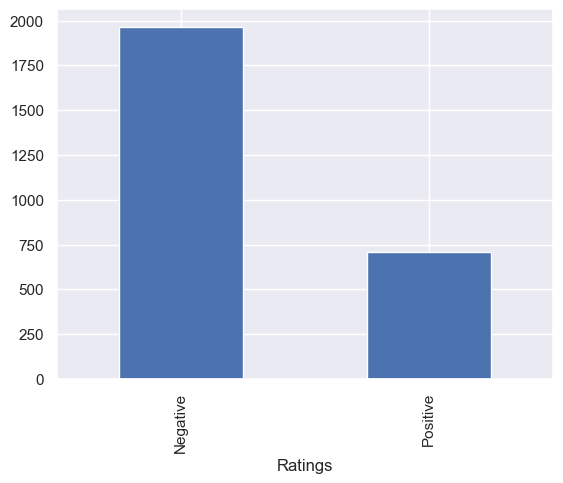

In [7]:
final_badf['Categ_Rating'].value_counts().plot(kind = 'bar')
plt.xlabel('Ratings')
plt.show()

We can clerly see that the dataset is highly imbalanced.We will balance out Training Dataset after Train_Test_Split

### Wordcloud

In [44]:
#pip install wordcloud

In [7]:
from wordcloud import WordCloud

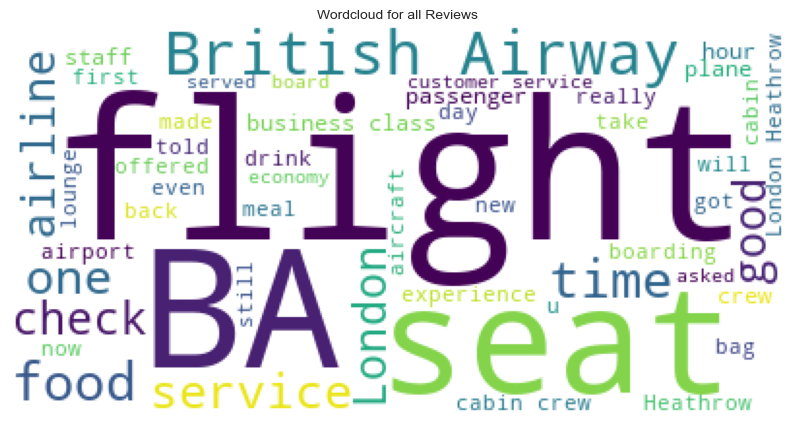

In [9]:
# Combine all reviews
reviews = " ".join([review for review in badf["Description"]])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all Reviews', fontsize=10)
plt.axis('off')
plt.show()

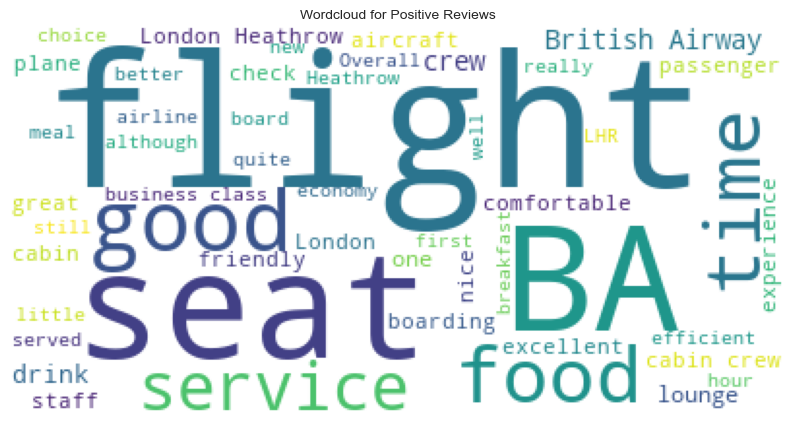

In [11]:
# Combine all reviews
reviews = " ".join([review for review in badf[badf['Categ_Rating']=="Positive"]["Description"]])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for Positive Reviews', fontsize=10)
plt.axis('off')
plt.show()

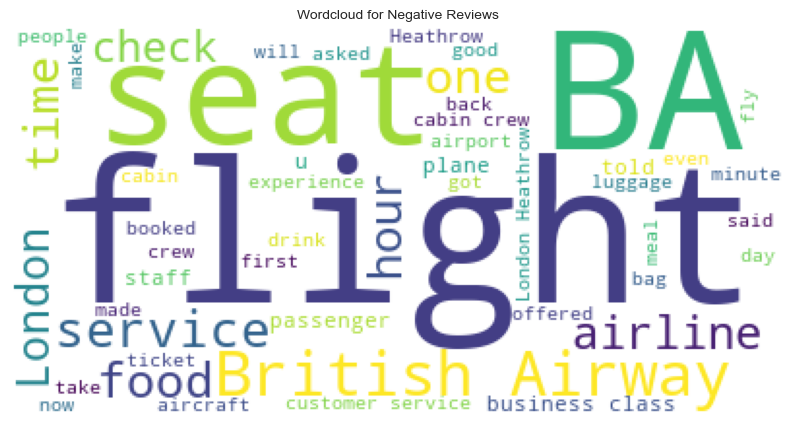

In [13]:
# Combine all reviews
reviews = " ".join([review for review in badf[badf['Categ_Rating']=="Negative"]["Description"]])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for Negative Reviews', fontsize=10)
plt.axis('off')
plt.show()

### 5. Text Pre-processing

In [11]:
#pip install nltk

In [13]:
import nltk
from nltk.corpus import stopwords
import string
import re
import pickle

In [15]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUSSAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.stem.porter import PorterStemmer

To build the corpus from the 'Description' reviews we perform the following
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the c

In [20]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, final_badf.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', final_badf.iloc[i]['Description'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [21]:
final_badf.head()

,Description,Categ_Rating
0,I decided to treat myself and my teenage dau...,Negative
1,I was very impressed with their efficient bo...,Positive
2,The flight scheduled at 1840 left 2hours 40 ...,Negative
4,On arriving at Mexico Airport we were told ...,Negative
5,I have flown British Airways for many years...,Negative


In [22]:
len(corpus)

2675

### 6. Vectorization

Using CountVectorizer to create Bag of words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(max_features = 5000)

In [32]:
# storing features and and labels in X and y 
X = bow_transformer.fit_transform(corpus).toarray()
y = final_badf['Categ_Rating']

In [34]:
print(f'Shape of X is :', X.shape)
print(f'Shape of y is :', y.shape)

Shape of X is : (2675, 5000)
Shape of y is : (2675,)


In [36]:
# Train-Test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 101)
print(f'Size of X_train : ',X_train.shape )
print(f'Size of X_test : ',X_test.shape )
print(f'Size of y_train : ',y_train.shape )
print(f'Size of y_test : ',y_test.shape )

Size of X_train :  (1872, 5000)
Size of X_test :  (803, 5000)
Size of y_train :  (1872,)
Size of y_test :  (803,)


In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

def model_evaluation(model_test,model_pred):
    accuracy = accuracy_score(model_test,model_pred)
    precision = precision_score(model_test,model_pred,average='weighted')
    recall = recall_score(model_test,model_pred,average='weighted')
    cm = confusion_matrix(model_test,model_pred)
    
    print('------   Text Dataset Scores    ------')
    print('Accuracy score  :{}%:'.format(round(accuracy*100,1)))
    print(f'Precision_score:',round(precision,2))
    print(f'Recol_score    :',round(recall,2))
    print("\t")
    sns.heatmap(cm,annot=True, fmt='d', linewidths=0.5, square=True, cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title('Confusion Matrix')
    plt.show()


def model_eval(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred, average='weighted')
    recall = recall_score(y_true,y_pred,average = 'weighted')
    print('_________Training Dataset scores____________ \n')
    print(f'Accuracy  : ',round(accuracy,2))
    print(f'Precision : ',round(precision,2))
    print(f'Recall    : ',round(recall,2))
    print('\n Confusion Matrix')
    print(confusion_matrix(y_true,y_pred))

### 7. MODAL BUILDING

### Multinomial  Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train,y_train)

nb_train = nb.predict(X_train)
nb_pred = nb.predict(X_test)

In [60]:
model_eval(y_train,nb_train)

_________Training Dataset scores____________ 

Accuracy  :  0.91
Precision :  0.92
Recall    :  0.91

 Confusion Matrix
[[1242  147]
 [  24  459]]


------   Text Dataset Scores    ------
Accuracy score  :82.1%:
Precision_score: 0.82
Recol_score    : 0.82
	


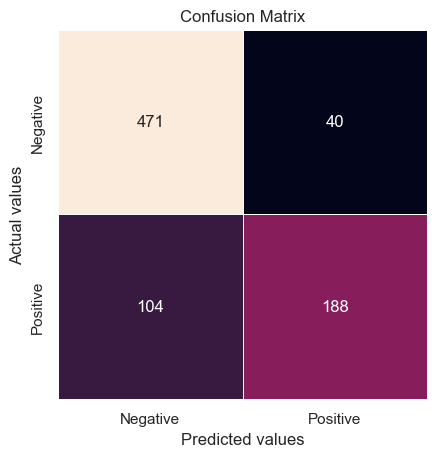

In [70]:
model_evaluation(nb_pred,y_test)

### LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 0.01,solver = 'liblinear')

lg.fit(X_train,y_train)

lg_pred = lg.predict(X_test)
lg_train = lg.predict(X_train)

In [74]:
model_eval(y_train,lg_train)

_________Training Dataset scores____________ 

Accuracy  :  0.89
Precision :  0.89
Recall    :  0.89

 Confusion Matrix
[[1329   60]
 [ 145  338]]


------   Text Dataset Scores    ------
Accuracy score  :82.7%:
Precision_score: 0.82
Recol_score    : 0.83
	


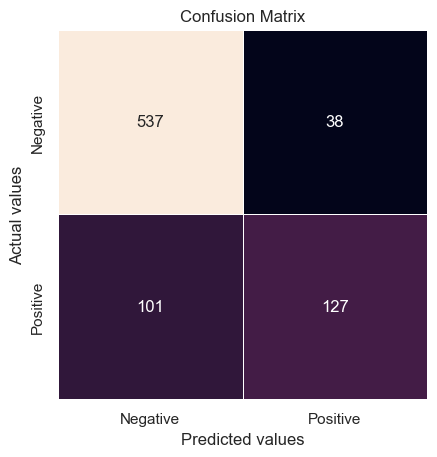

In [77]:
model_evaluation(y_test,lg_pred)

### RandomForesClassifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

rfc_train = rfc.predict(X_train)
rfc_pred = rfc.predict(X_test)

In [113]:
model_eval(y_train,rfc_train)

_________Training Dataset scores____________ 

Accuracy  :  1.0
Precision :  1.0
Recall    :  1.0

 Confusion Matrix
[[1389    0]
 [   0  483]]


------   Text Dataset Scores    ------
Accuracy score  :81.3%:
Precision_score: 0.81
Recol_score    : 0.81
	


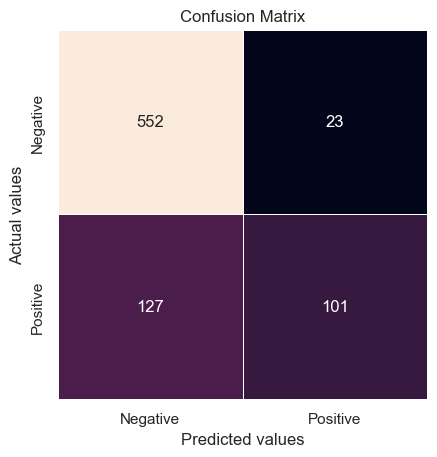

In [111]:
model_evaluation(y_test,rfc_pred)

#### Let's adjust parameter on Random Forest Classifier

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1_weighted',  # suitable for imbalanced data
    cv=3
)
grid_search.fit(X_train, y_train)

grid_rfc_train = grid_search.predict(X_train) # prediction on training dataset
grid_rfc_pred = grid_search.predict(X_test) # prediction on test dataset


In [95]:
grid_search.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 10, 'n_estimators': 200}

In [99]:
model_eval(grid_rfc_train,y_train)

_________Training Dataset scores____________ 

Accuracy  :  0.94
Precision :  0.94
Recall    :  0.94

 Confusion Matrix
[[1299   20]
 [  90  463]]


------   Text Dataset Scores    ------
Accuracy score  :84.1%:
Precision_score: 0.84
Recol_score    : 0.84
	


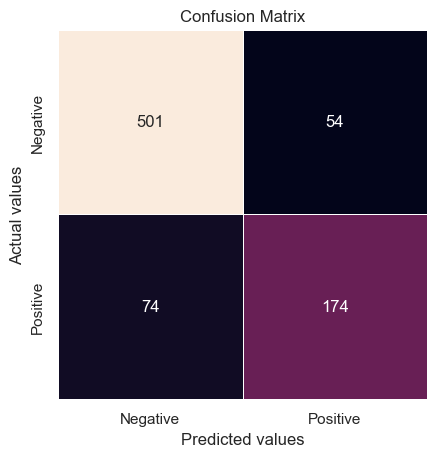

In [103]:
model_evaluation(grid_rfc_pred,y_test)

**Instead of Regulization and model based based balancing techniques our Model is either showing some sort of Overfitting on training dataset or not performing well at all.**
- **So,Let's Balance the Training Dataset first then we build Model**

<Axes: xlabel='Categ_Rating'>

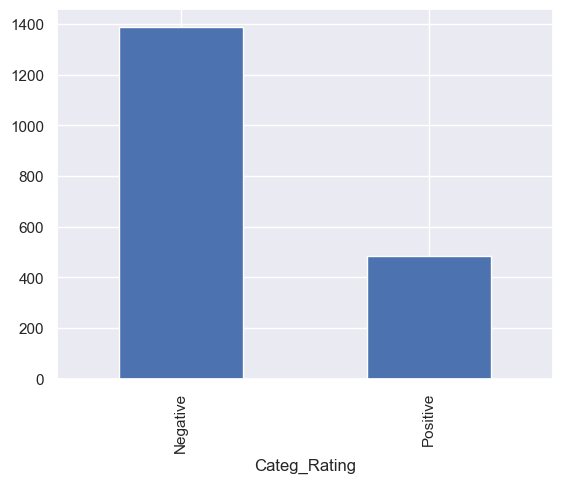

In [99]:
pd.Series(y_train).value_counts().plot(kind = 'bar')

### Random Over Sampling
Our Dataset is highly unbalanced so first we will Banlanced our Dataset by applying **RandomOverSampler** to make duplicates of minority class and make it equal to the Mojority one.Then we wll evalute performance of our models

In [117]:
from imblearn.over_sampling import RandomOverSampler
rdsampler = RandomOverSampler()

In [119]:
X_rsmpl,y_rsmpl = rdsampler.fit_resample(X_train,y_train)

<Axes: xlabel='Categ_Rating'>

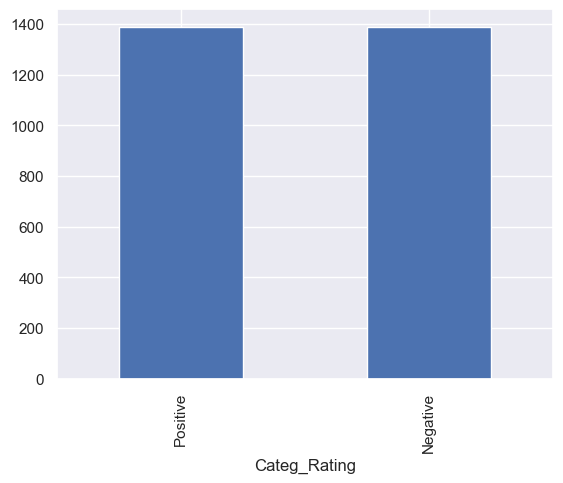

In [121]:
y_rsmpl.value_counts().plot(kind = 'bar')

Now, we can clearly see out training data is Balanced. We will fit our model on Balanced data and see the results on Test Dataset.

## Model Building

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_rsmpl,y_rsmpl)

X_train_pred = lg.predict(X_rsmpl)
lg_pred = lg.predict(X_test)

In [127]:
accuracy_score(y_rsmpl,X_train_pred)

0.9985601151907847

In [130]:
model_eval(y_rsmpl,X_train_pred)

_________Training Dataset scores____________ 

Accuracy  :  1.0
Precision :  1.0
Recall    :  1.0

 Confusion Matrix
[[1385    4]
 [   0 1389]]


------   Text Dataset Scores    ------
Accuracy score  :82.3%:
Precision_score: 0.82
Recol_score    : 0.82
	


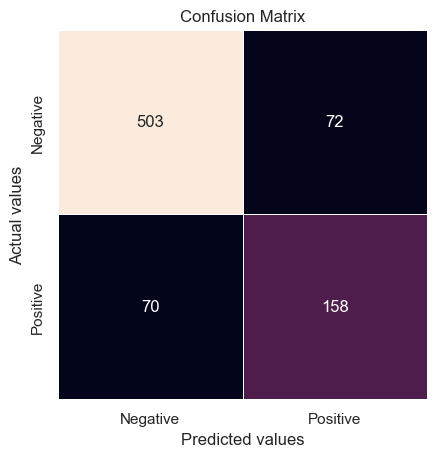

In [132]:
model_evaluation(y_test,lg_pred)

### Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_rsmpl,y_rsmpl)

rfc_train = rfc.predict(X_rsmpl)
rfc_pred = rfc.predict(X_test)

In [139]:
model_eval(rfc_train,y_rsmpl)

_________Training Dataset scores____________ 

Accuracy  :  1.0
Precision :  1.0
Recall    :  1.0

 Confusion Matrix
[[1389    0]
 [   0 1389]]


In [141]:
rfc_pred = rfc.predict(X_test)

------   Text Dataset Scores    ------
Accuracy score  :83.2%:
Precision_score: 0.83
Recol_score    : 0.83
	


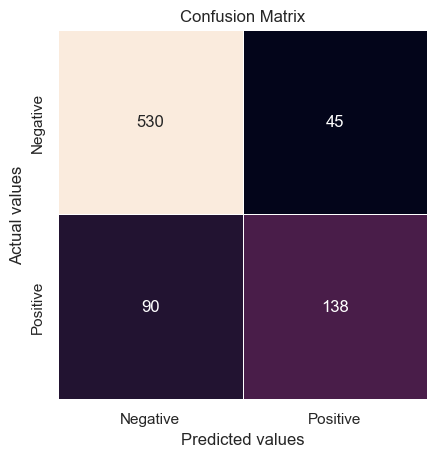

In [145]:
model_evaluation(y_test,rfc_pred)

In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10],}
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5)

grid.fit(X_rsmpl, y_rsmpl)

grid_train = grid.predict(X_rsmpl)
grid_pred = grid.predict(X_test)

------   Text Dataset Scores    ------
Accuracy score  :82.3%:
Precision_score: 0.82
Recol_score    : 0.82
	


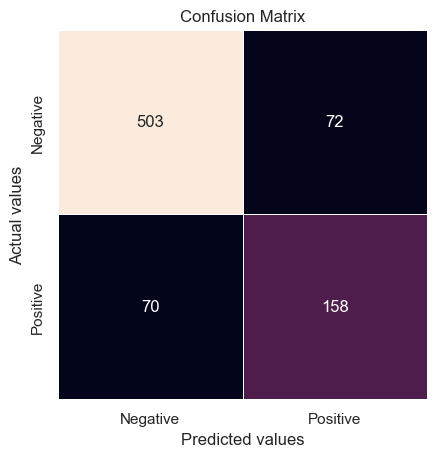

In [149]:
model_evaluation(y_test,grid_pred)

#### Multinomial Naive Bayes

In [152]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_rsmpl,y_rsmpl)

nb_train = nb.predict(X_rsmpl)
nb_pred = nb.predict(X_test)

In [156]:
model_eval(nb_train,y_rsmpl)

_________Training Dataset scores____________ 

Accuracy  :  0.93
Precision :  0.93
Recall    :  0.93

 Confusion Matrix
[[1225   32]
 [ 164 1357]]


------   Text Dataset Scores    ------
Accuracy score  :81.8%:
Precision_score: 0.84
Recol_score    : 0.82
	


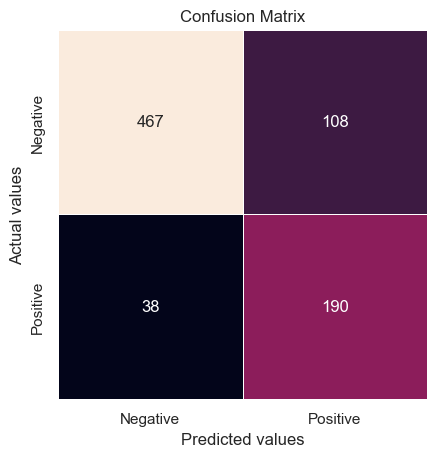

In [158]:
model_evaluation(y_test,nb_pred)

### Over Sampling and Under Sampling together
from the above **RandomOverSampler** resuts it seems like our model is overfitting on trainig Dataset by applying RandomOverSampler
 so here We will apply both **OverSampling** for minority class and **UnderSampling** for minority class together then will evaluate the performance of ou models on the same.

In [162]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [164]:
# Define the oversampling and undersampling steps
oversample = SMOTE(sampling_strategy=0.5)  # SMOTE will make the minority class 50% of the majority class
undersample = RandomUnderSampler(sampling_strategy=0.8)  # Majority class will be reduced to 80% of original

# Create a pipeline that first applies SMOTE, then RandomUnderSampler
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

# Apply the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

#### Multinomianl Naive Bayes

In [167]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_resampled,y_resampled)

nb_train = nb.predict(X_resampled)
nb_pred = nb.predict(X_test)

------   Text Dataset Scores    ------
Accuracy score  :81.2%:
Precision_score: 0.84
Recol_score    : 0.81
	


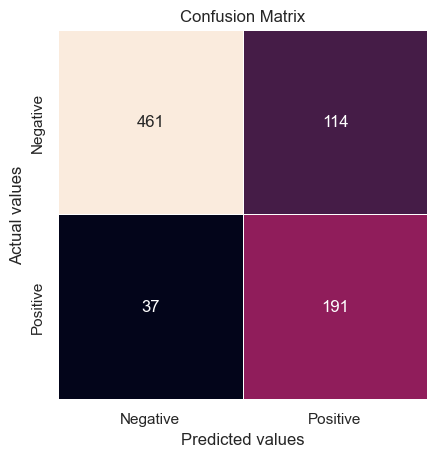

In [169]:
model_evaluation(y_test,nb_pred)

#### Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_resampled,y_resampled)

X_train_pred = lg.predict(X_resampled)
lg_pred = lg.predict(X_test)

------   Text Dataset Scores    ------
Accuracy score  :81.7%:
Precision_score: 0.83
Recol_score    : 0.82
	


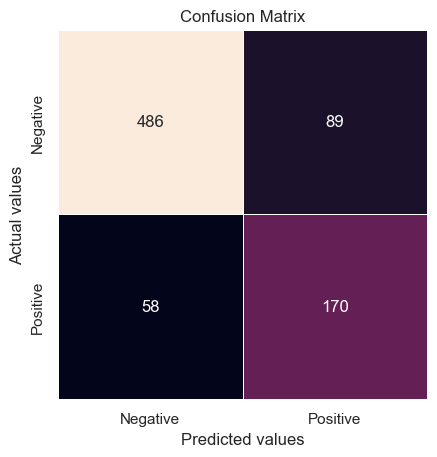

In [174]:
model_evaluation(y_test,lg_pred)

#### Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_resampled,y_resampled)

rfc_train = rfc.predict(X_resampled)
rfc_pred = rfc.predict(X_test)

------   Text Dataset Scores    ------
Accuracy score  :80.6%:
Precision_score: 0.8
Recol_score    : 0.81
	


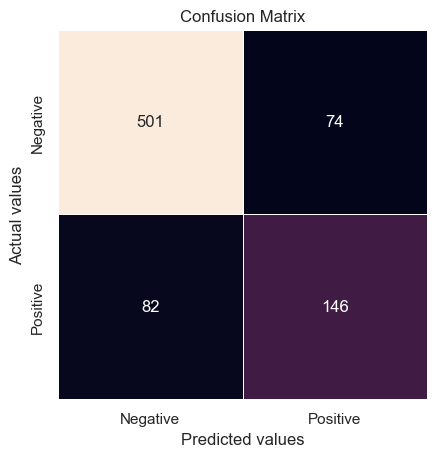

In [179]:
model_evaluation(y_test,rfc_pred)